In [42]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

In [43]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/initial.csv')
sdf.params={'mass':0.01}
sdf

,x,y,vx,vy,u,h,rho
0,-0.500000,-0.500000,0,0,0.0,0.063246,1
1,-0.468377,-0.500000,0,0,0.0,0.063246,1
2,-0.436754,-0.500000,0,0,0.0,0.063246,1
3,-0.405132,-0.500000,0,0,0.0,0.063246,1
4,-0.373509,-0.500000,0,0,0.0,0.063246,1
...,...,...,...,...,...,...,...
956,0.322192,0.448683,0,0,0.0,0.063246,1
957,0.353815,0.448683,0,0,0.0,0.063246,1
958,0.385438,0.448683,0,0,0.0,0.063246,1
959,0.417061,0.448683,0,0,0.0,0.063246,1


<Axes: xlabel='x', ylabel='y'>

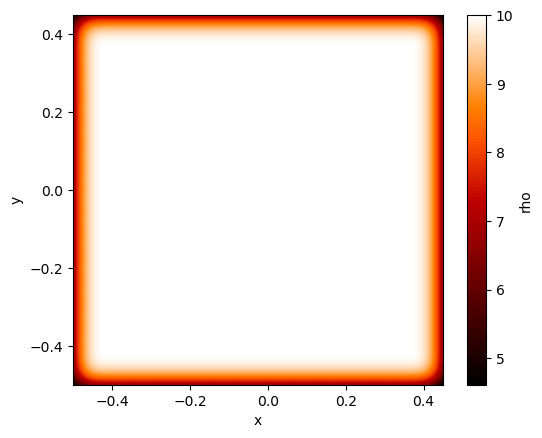

In [44]:
sdf.render('rho', xsec=1.0)

In [45]:
sdft = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdft.params={'mass':0.01}
sdft

,x,y,vx,vy,u,h,rho
0,-0.500000,-0.500000,-0.0,-0.0,0.0,0.054350,4.874905
1,-0.468377,-0.500000,-0.0,-0.0,0.0,0.044411,7.300889
2,-0.436754,-0.500000,-0.0,-0.0,0.0,0.043884,7.477417
3,-0.405132,-0.500000,-0.0,-0.0,0.0,0.043884,7.477417
4,-0.373509,-0.500000,-0.0,-0.0,0.0,0.043884,7.477417
...,...,...,...,...,...,...,...
956,0.322192,0.448683,0.0,0.0,0.0,0.043884,7.477417
957,0.353815,0.448683,0.0,0.0,0.0,0.043884,7.477417
958,0.385438,0.448683,0.0,0.0,0.0,0.043884,7.477417
959,0.417061,0.448683,0.0,0.0,0.0,0.044411,7.300889


<Axes: xlabel='x', ylabel='y'>

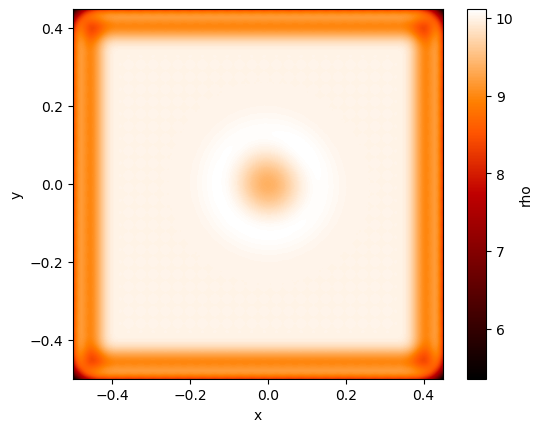

In [46]:
sdft.render('rho', xsec=1.0)

In [28]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [29]:
T = 6
time = range(0, T)
ang_mom = np.zeros(T)

fig = plt.figure()

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    plt.clf()
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))
plt.show()

<Figure size 640x480 with 0 Axes>

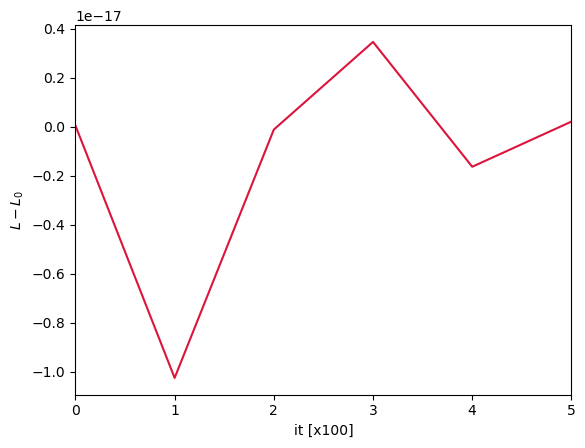

In [53]:
#fig = plt.figure(figsize=(8,8))
plt.plot(time[:], ang_mom[:], '-', color='crimson')
plt.xlabel("it [x100]")
plt.ylabel("$L-L_0$")
plt.xlim(0, T-1)
plt.show()

In [36]:
rad = sdft["x"]**2 + sdft["y"]**2
rho = sdft["rho"]
len(rad)

961

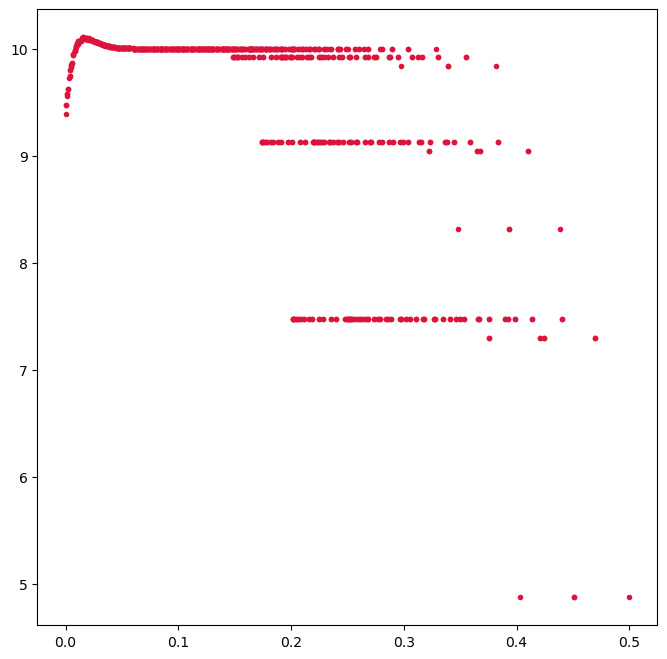

In [37]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, rho, ".", color="crimson")
plt.show()